In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
data = pd.read_csv('insurance.csv')

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Age,sex, bmi, children, smoker, and region all indepdent variables
while charges in a depdend variable. Charges will be our vector,y. And the rest will be our matrix, X.

In [8]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [11]:
print('There are: ', data.shape[0], 'Rows')
print('There are: ', data.shape[1], 'Columns')

There are:  1338 Rows
There are:  7 Columns


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
 data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Get overall statistics of the data

In [22]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Convert columns from strings to numerical values['sex', 'smoker', 'region']

In [23]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
data['sex'].unique()
#convert male and female to 0 and 1

array(['female', 'male'], dtype=object)

In [28]:
data['sex'] = data['sex'].map({'female':0,'male':1})

In [29]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [30]:
data['smoker'] = data['smoker'].map({'yes':1,'no':0})

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [32]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [34]:
data['region']= data['region'].map({'southwest':1, 'southeast':2,'northwest':3,'northeast':4})

In [35]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


## Store Feature Matrix in X and Target in Vector y

In [37]:
X = data.drop(['charges'], axis=1)
y = data['charges']

In [40]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [41]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Train/Test split
1. Split data into two part: a training set and a testing set

2. Train the model(s) on training set

3. Test the model(s) on testing set

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,
                                                random_state=42)

We will train our model of X_train, and y_train.But will also test our model of X_test  and compare it with y_test.

## Import the models

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Model Training

In [47]:
LR = LinearRegression()
LR.fit(X_train,y_train)
SVM = SVR()
SVM.fit(X_train,y_train)
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
GBR = GradientBoostingRegressor()
GBR.fit(X_train,y_train)

GradientBoostingRegressor()

SVR finds a hyperplane that best fits the data points in a continuous space, instead of fitting a line to the data points.

RFR uses ensemble methods (bagging) to solve both regression and classification problems.

GBR sequentially combines many weak learners to form a strong learner.  

## Prediction on Test Data

In [52]:
#perform predictions on X_test
y_pred1 = LR.predict(X_test)
y_pred2 = SVM.predict(X_test)
y_pred3 = RF.predict(X_test)
y_pred4 = GBR.predict(X_test)

#Create a dataframe to compare predicted and actual values
df = pd.DataFrame({'Actual':y_test, 'LR':y_pred1, 'SVM': y_pred2,
                  'RF':y_pred3, 'GBR':y_pred4})
df

,Actual,LR,SVM,RF,GBR
764,9095.06825,8924.407244,9548.261584,10450.761342,11001.128629
887,5272.17580,7116.295018,9492.515425,5512.553545,5840.174656
890,29330.98315,36909.013521,9648.758701,28605.901591,28001.980112
1293,9301.89355,9507.874691,9555.044136,10883.825761,9745.291602
259,33750.29180,27013.350008,9420.421978,34310.235538,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,46972.523888,45431.423211
575,12222.89830,11814.555568,9625.431547,12481.753509,12465.025294
535,6067.12675,7638.107736,9504.168517,6395.236432,6974.336525
543,63770.42801,40959.081722,9605.004594,46680.919443,47862.047791


## Compare Performance Visually 

We need to find the base model

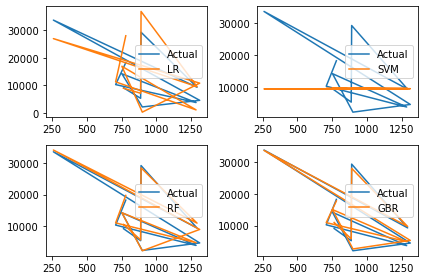

In [59]:
plt.subplot(221)
# 2rows,2columns, first sub plot
plt.plot(df['Actual'].iloc[0:11], label='Actual')
plt.plot(df['LR'].iloc[0:11], label='LR')
plt.legend()

plt.subplot(222)
# 2rows,2columns, first sub plot
plt.plot(df['Actual'].iloc[0:11], label='Actual')
plt.plot(df['SVM'].iloc[0:11], label='SVM')
plt.legend()

plt.subplot(223)
# 2rows,2columns, first sub plot
plt.plot(df['Actual'].iloc[0:11], label='Actual')
plt.plot(df['RF'].iloc[0:11], label='RF')
plt.legend()

plt.subplot(224)
# 2rows,2columns, first sub plot
plt.plot(df['Actual'].iloc[0:11], label='Actual')
plt.plot(df['GBR'].iloc[0:11], label='GBR')

plt.tight_layout()
plt.legend()

Model three and model four are closer to the actual value. Furthermore, model four is better than model three.

## Evaluating the Algorithm 

Measuring the goodness of fit 
the better value of R^2, the better the regression model.

In [60]:
from sklearn import metrics

In [61]:
score_1 = metrics.r2_score(y_test,y_pred1)
score_2 = metrics.r2_score(y_test,y_pred2)
score_3 = metrics.r2_score(y_test,y_pred3)
score_4 = metrics.r2_score(y_test,y_pred4)

In [63]:
print(score_1,score_2,score_3,score_4)

0.7833463107364539 -0.07229762787861826 0.8621590438902347 0.8779936181637191


As we see model four, performs better

We can also use mean absolute error to evalute our model. 
The lower the value, the better.

In [65]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2= metrics.mean_absolute_error(y_test,y_pred2)
s3= metrics.mean_absolute_error(y_test,y_pred3)
s4= metrics.mean_absolute_error(y_test,y_pred4)

In [66]:
print(s1,s2,s3,s4)


4186.508898366435 8592.428727899724 2520.1570420200255 2447.167158715136


From this information, we can say that model four is the best model for this dataset

## Predict charges for new customers

In [68]:
data1 = {'age': 40, 'sex':1, 'bmi': 40.30, 'children':4, 'smoker':1,'region':2}
df1 = pd.DataFrame(data1,index=[0])
df1

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [69]:
new_pred = GBR.predict(df1)
print(new_pred)

[44757.24853851]


## We can train our entire dataset into GradientBoostingRegressor() and save our model


In [71]:
GBR = GradientBoostingRegressor()
GBR.fit(X,y)

GradientBoostingRegressor()

In [72]:
import joblib 

In [73]:
joblib.dump(GBR, 'model_joblib_GBR')

['model_joblib_GBR']

## Now, in the future you can perform prediction using this model.

In [74]:
# e.g
model1 = joblib.load('model_joblib_GBR')

In [76]:
model1.predict(df1)

array([42148.361888])

This model is more accurate because we have trained it into the entire dataset.